In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("time_series_booking_data.csv", parse_dates=["Date"])

data.fillna(method="ffill", inplace=True)

data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data["DayOfWeek"] = data["Date"].dt.dayofweek

print(data.head())
print(data.info())

        Date Room Type  Occupancy Rate  Price  Bookings  Season  Event Nearby  \
0 2020-01-01    Single            0.62   81.0        10  Winter             1   
1 2020-01-01    Shared            0.54   46.2         0  Winter             0   
2 2020-01-01     Suite            0.44  144.0         7  Winter             0   
3 2020-01-02    Single            0.60   80.0         9  Winter             0   
4 2020-01-02    Shared            0.44   43.2         7  Winter             0   

   Academic Event  Year  Month  Day  DayOfWeek  
0               0  2020      1    1          2  
1               0  2020      1    1          2  
2               0  2020      1    1          2  
3               0  2020      1    2          3  
4               0  2020      1    2          3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Dat

C:\Users\user\AppData\Local\Temp\ipykernel_13580\3057650475.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


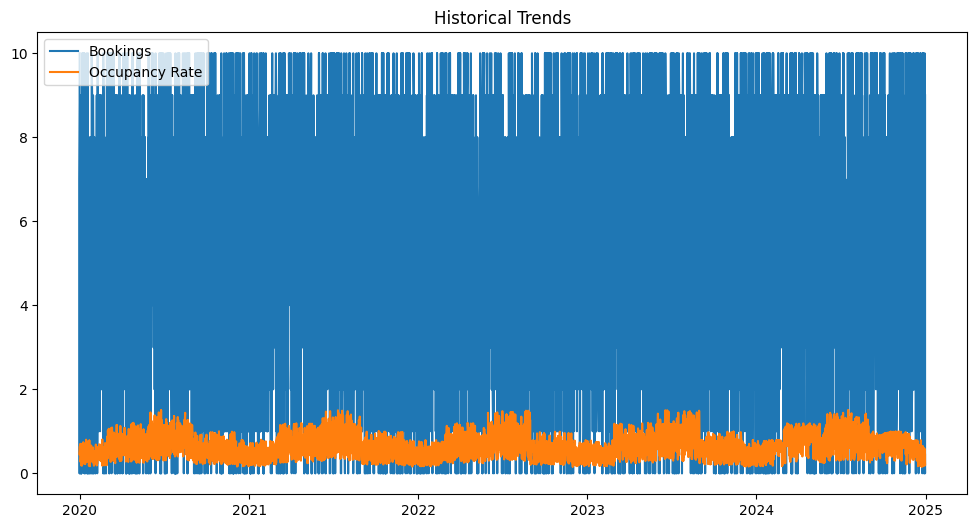

ValueError: could not convert string to float: 'Single'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Bookings"], label="Bookings")
plt.plot(data["Date"], data["Occupancy Rate"], label="Occupancy Rate")
plt.legend()
plt.title("Historical Trends")
plt.show()

corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [ ]:
data["Lag_1"] = data["Bookings"].shift(1)  # Previous day's bookings
data["Lag_7"] = data["Bookings"].shift(7)  # Bookings a week ago

data["Rolling_7"] = data["Bookings"].rolling(window=7).mean()

data.fillna(0, inplace=True)

print(data.head())

        Date Room Type  Occupancy Rate  Price  Bookings  Season  Event Nearby  \
0 2020-01-01    Single            0.62   81.0        10  Winter             1   
1 2020-01-01    Shared            0.54   46.2         0  Winter             0   
2 2020-01-01     Suite            0.44  144.0         7  Winter             0   
3 2020-01-02    Single            0.60   80.0         9  Winter             0   
4 2020-01-02    Shared            0.44   43.2         7  Winter             0   

   Academic Event  Year  Month  Day  DayOfWeek  Lag_1  Lag_7  Rolling_7  
0               0  2020      1    1          2    0.0    0.0        0.0  
1               0  2020      1    1          2   10.0    0.0        0.0  
2               0  2020      1    1          2    0.0    0.0        0.0  
3               0  2020      1    2          3    7.0    0.0        0.0  
4               0  2020      1    2          3    9.0    0.0        0.0  


In [ ]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)

train = data[:train_size]
val = data[train_size:train_size + val_size]
test = data[train_size + val_size:]

print("Train size:", len(train))
print("Validation size:", len(val))
print("Test size:", len(test))


Train size: 3836
Validation size: 1096
Test size: 549


15:10:14 - cmdstanpy - INFO - Chain [1] start processing
15:10:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds']
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'], m.history['y'], 'k.',


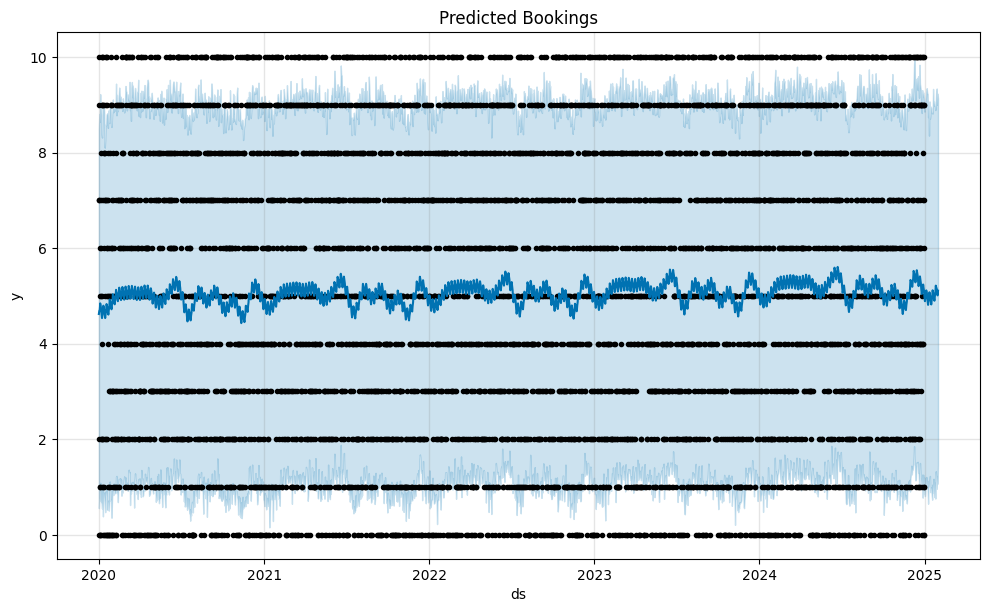

In [ ]:
from prophet import Prophet

prophet_data = data[["Date", "Bookings"]].rename(columns={"Date": "ds", "Bookings": "y"})

model = Prophet()
model.fit(prophet_data)

future = model.make_future_dataframe(periods=30)  # Predict next 30 days
forecast = model.predict(future)

model.plot(forecast)
plt.title("Predicted Bookings")
plt.show()


In [ ]:
model = Prophet(seasonality_mode="multiplicative")
model.add_seasonality(name="weekly", period=7, fourier_order=3)
model.fit(prophet_data)

NameError: name 'Prophet' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual = test["Bookings"]
predicted = forecast["yhat"][-len(test):]

rmse = mean_squared_error(actual, predicted, squared=False)
mae = mean_absolute_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 3.0865364902766714
MAE: 2.636172472734467


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


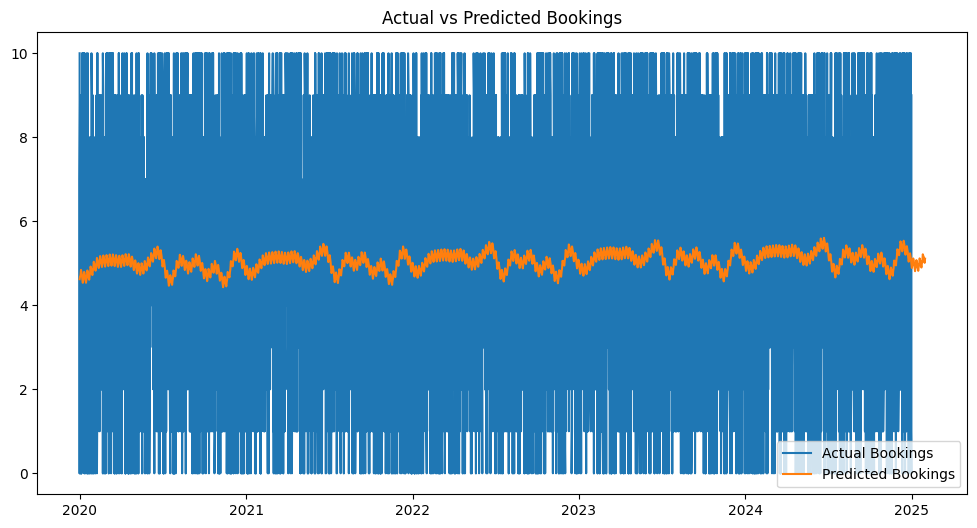

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Bookings"], label="Actual Bookings")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Bookings")
plt.legend()
plt.title("Actual vs Predicted Bookings")
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds']
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'], seas[name], ls='-', c='#0072B2')
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of

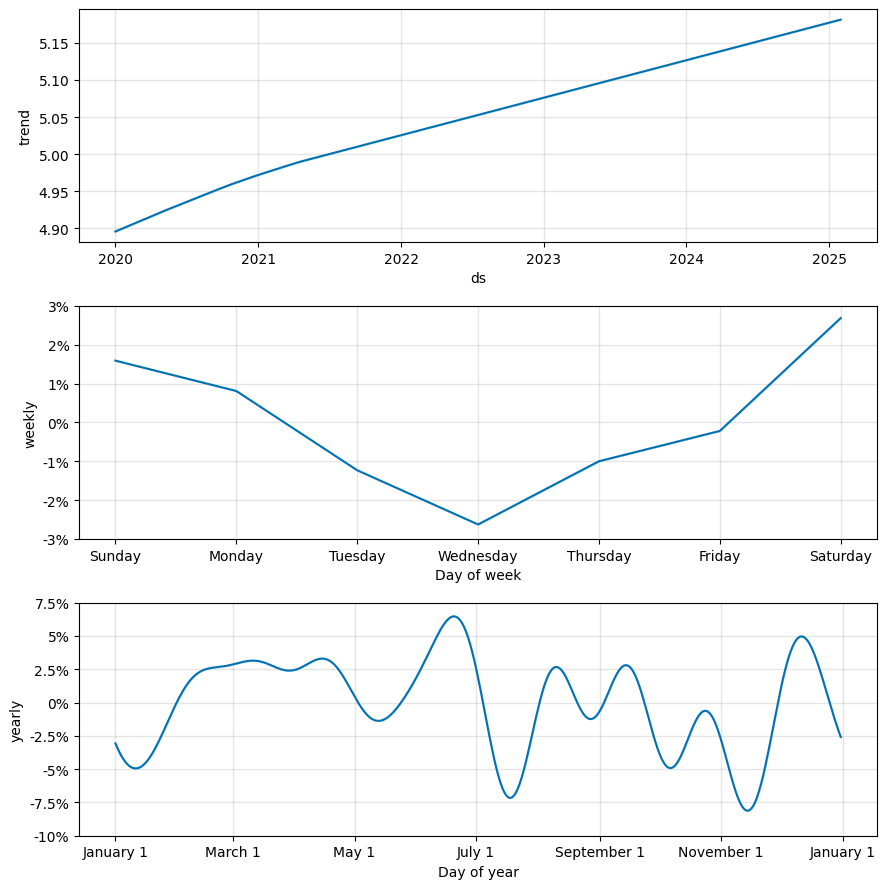

In [ ]:
model.plot_components(forecast)
plt.show()

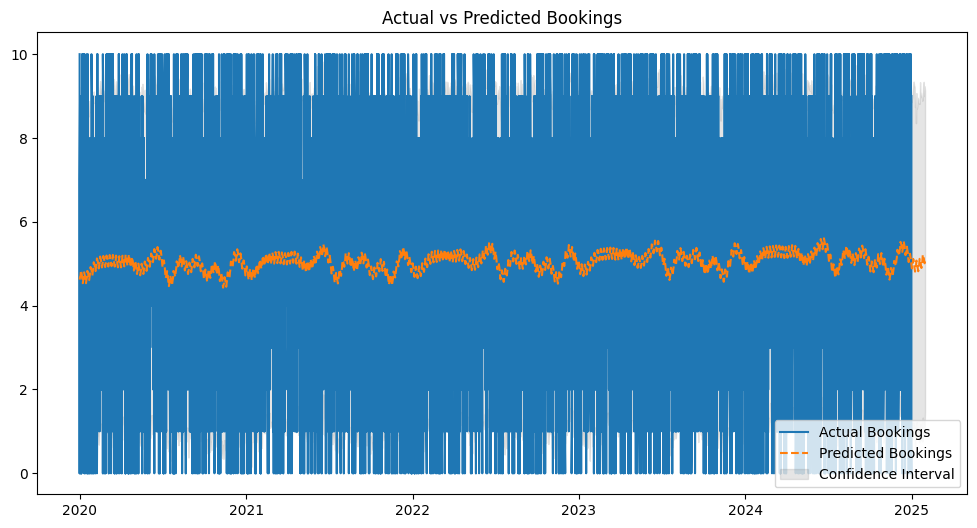

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Bookings"], label="Actual Bookings")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Bookings", linestyle="dashed")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color='gray', alpha=0.2, label="Confidence Interval")
plt.legend()
plt.title("Actual vs Predicted Bookings")
plt.show()

In [ ]:
model = Prophet(seasonality_mode="multiplicative")
model.add_seasonality(name="academic_calendar", period=365.25, fourier_order=5)
model.fit(prophet_data)

model.plot_components(forecast)
plt.show()

NameError: name 'Prophet' is not defined

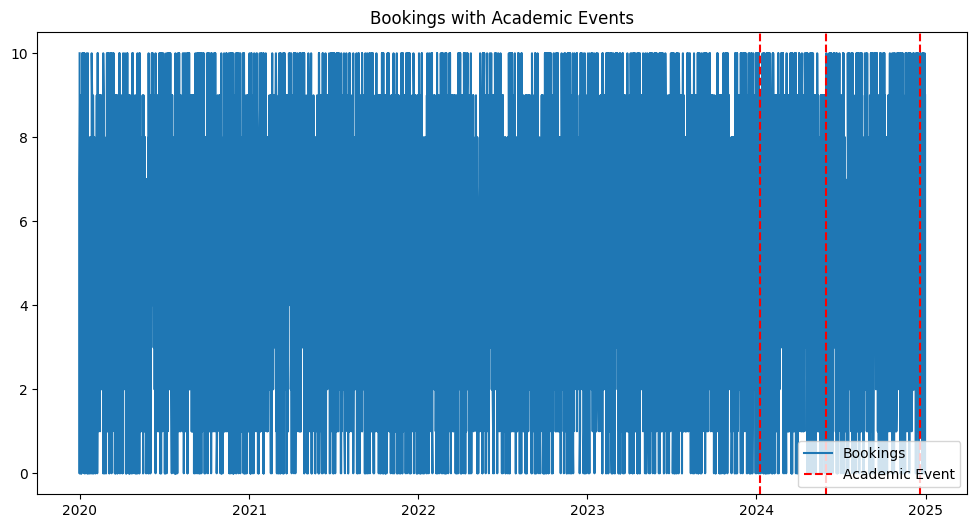

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Bookings"], label="Bookings")

academic_events = ["2024-01-10", "2024-06-01", "2024-12-20"]
for event in academic_events:
    plt.axvline(pd.to_datetime(event), color="red", linestyle="--", label="Academic Event" if event == academic_events[0] else "")

plt.legend()
plt.title("Bookings with Academic Events")
plt.show()


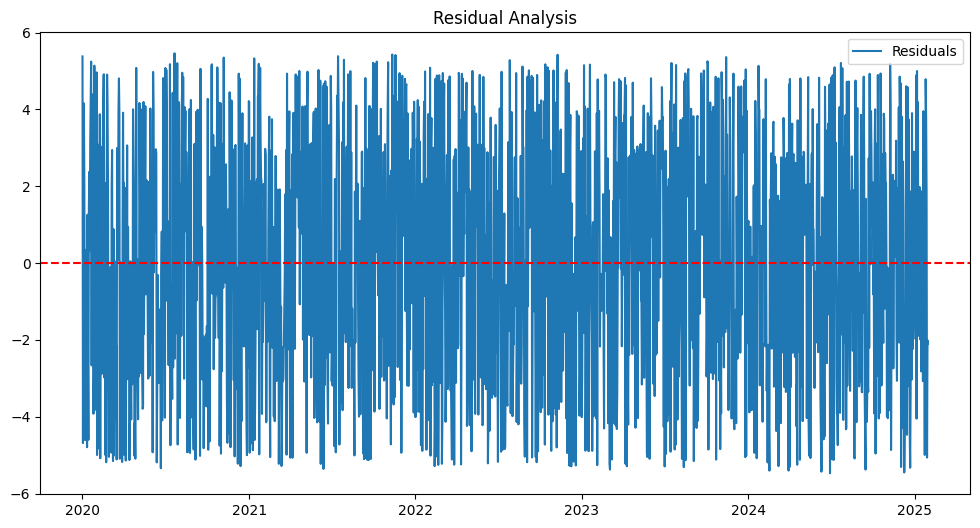

Anomalies:
Empty DataFrame
Columns: [ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat, residuals]
Index: []


In [ ]:
forecast["residuals"] = data["Bookings"][:len(forecast)] - forecast["yhat"]

plt.figure(figsize=(12, 6))
plt.plot(forecast["ds"], forecast["residuals"], label="Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Analysis")
plt.legend()
plt.show()

anomalies = forecast[forecast["residuals"].abs() > forecast["yhat_upper"] - forecast["yhat_lower"]]
print("Anomalies:")
print(anomalies)


In [ ]:
import pickle

with open("booking_model.pkl", "wb") as file:
    pickle.dump(model, file)


NameError: name 'model' is not defined